In [1]:
#References:
#https://www.kaggle.com/vadim0912/911-calls-visualization

In [2]:
#Imports
%matplotlib inline

import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import calendar
import plotly
plotly.offline.init_notebook_mode()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pandas as pd
import numpy as np
import datetime





In [3]:
#Data

data = pd.read_csv('/Users/BrianLee/Desktop/KAGGLE/911.csv')

In [4]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [5]:
data.describe()

lat            lng            zip         e
count  326425.000000  326425.000000  286835.000000  326425.0
mean       40.159163     -75.316090   19234.318333       1.0
std         0.088485       0.160077     303.629187       0.0
min        30.333596     -95.595595    7203.000000       1.0
25%        40.099888     -75.392104   19038.000000       1.0
50%        40.144467     -75.304422   19401.000000       1.0
75%        40.229008     -75.210760   19446.000000       1.0
max        41.167156     -74.280113   77316.000000       1.0

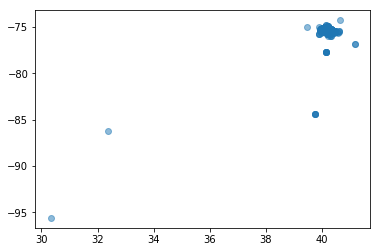

In [6]:
x = data[['lat']]
y = data[['lng']]

plt.scatter(x, y, alpha=0.5)
plt.show()

In [7]:
# Title is the category of the call
data["title"].value_counts()

Traffic: VEHICLE ACCIDENT -             76179
Traffic: DISABLED VEHICLE -             23957
Fire: FIRE ALARM                        18436
EMS: RESPIRATORY EMERGENCY              16602
EMS: FALL VICTIM                        16438
EMS: CARDIAC EMERGENCY                  16100
EMS: VEHICLE ACCIDENT                   12976
Traffic: ROAD OBSTRUCTION -             10668
EMS: SUBJECT IN PAIN                     9149
EMS: HEAD INJURY                         8491
EMS: UNKNOWN MEDICAL EMERGENCY           5670
EMS: SYNCOPAL EPISODE                    5554
Fire: VEHICLE ACCIDENT                   5541
EMS: SEIZURES                            5371
EMS: GENERAL WEAKNESS                    5339
EMS: ALTERED MENTAL STATUS               4765
Fire: FIRE INVESTIGATION                 4636
EMS: ABDOMINAL PAINS                     4618
EMS: MEDICAL ALERT ALARM                 4512
EMS: HEMORRHAGING                        4118
EMS: UNCONSCIOUS SUBJECT                 4091
EMS: CVA/STROKE                   

In [8]:
#Since any categorical features are not included in the correlation matrix, we need much more data cleaning
#and feature engineering

uniques = np.unique(data['title'])
uniques.size #Running this shows us that there are in total 133 reasons 911 has been called.

133

Number of calls with EMS: ABDOMINAL PAINS 4618
Number of calls with EMS: ALTERED MENTAL STATUS 4765
Number of calls with EMS: ASSAULT VICTIM 2061
Number of calls with EMS: BACK PAINS/INJURY 2441
Number of calls with EMS: CARDIAC ARREST 2411
Number of calls with EMS: CARDIAC EMERGENCY 16100
Number of calls with EMS: CVA/STROKE 4057
Number of calls with EMS: DIABETIC EMERGENCY 2849
Number of calls with EMS: DIZZINESS 2568
Number of calls with EMS: FALL VICTIM 16438
Number of calls with EMS: FRACTURE 2102
Number of calls with EMS: GENERAL WEAKNESS 5339
Number of calls with EMS: HEAD INJURY 8491
Number of calls with EMS: HEMORRHAGING 4118
Number of calls with EMS: MEDICAL ALERT ALARM 4512
Number of calls with EMS: NAUSEA/VOMITING 3831
Number of calls with EMS: OVERDOSE 4055
Number of calls with EMS: RESPIRATORY EMERGENCY 16602
Number of calls with EMS: SEIZURES 5371
Number of calls with EMS: SUBJECT IN PAIN 9149
Number of calls with EMS: SYNCOPAL EPISODE 5554
Number of calls with EMS: UNCO

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Number of calls with Fire: CARBON MONOXIDE DETECTOR 1863
Number of calls with Fire: ELECTRICAL FIRE OUTSIDE 2331
Number of calls with Fire: FIRE ALARM 18436
Number of calls with Fire: FIRE INVESTIGATION 4636
Number of calls with Fire: FIRE SPECIAL SERVICE 1938
Number of calls with Fire: GAS-ODOR/LEAK 3403
Number of calls with Fire: VEHICLE ACCIDENT 5541
Number of calls with Traffic: DISABLED VEHICLE - 23957
Number of calls with Traffic: HAZARDOUS ROAD CONDITIONS - 3222
Number of calls with Traffic: ROAD OBSTRUCTION - 10668
Number of calls with Traffic: VEHICLE ACCIDENT - 76179
Number of calls with Traffic: VEHICLE FIRE - 1739


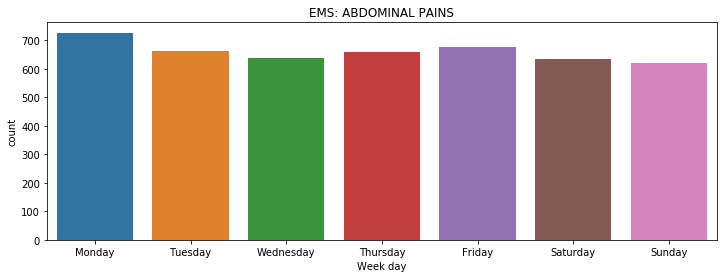

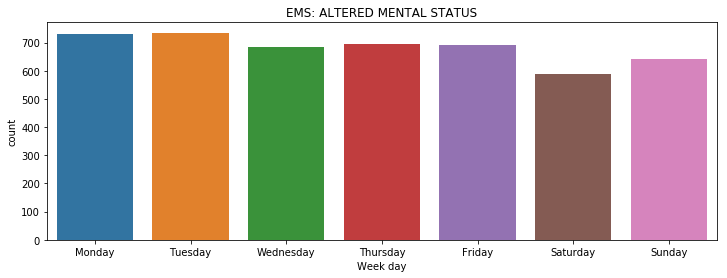

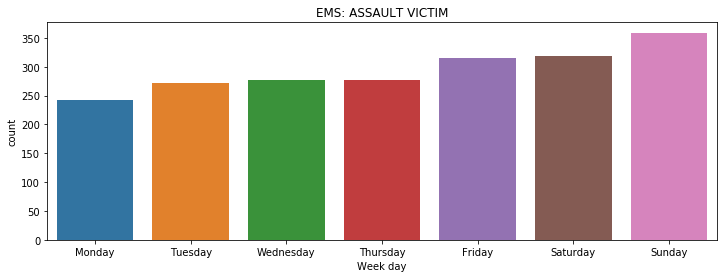

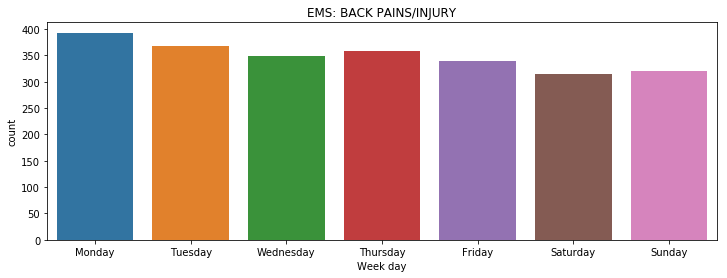

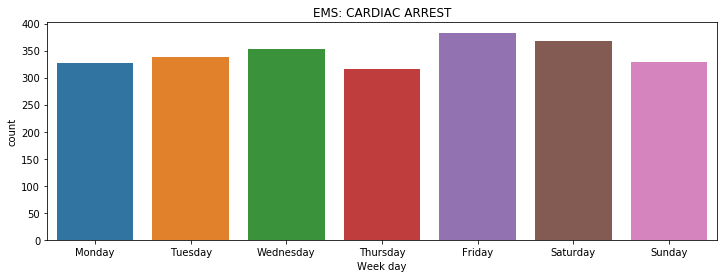

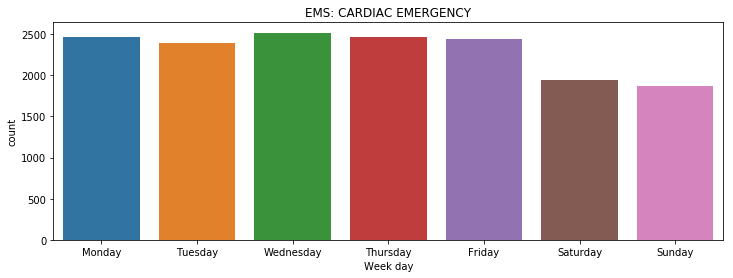

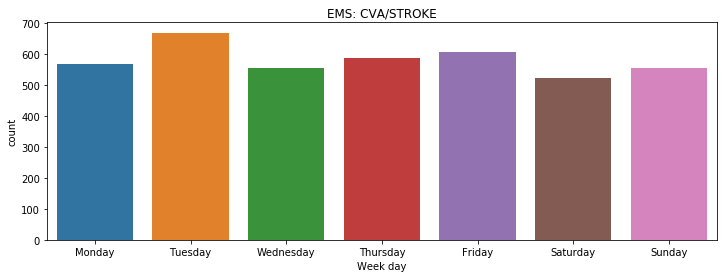

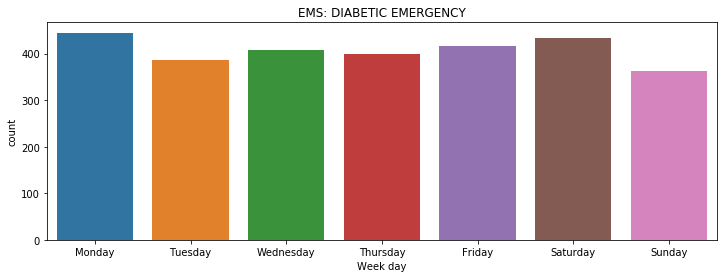

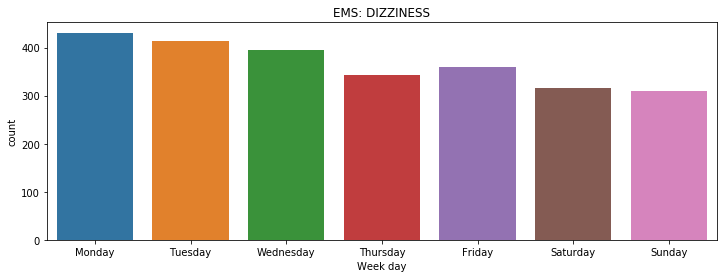

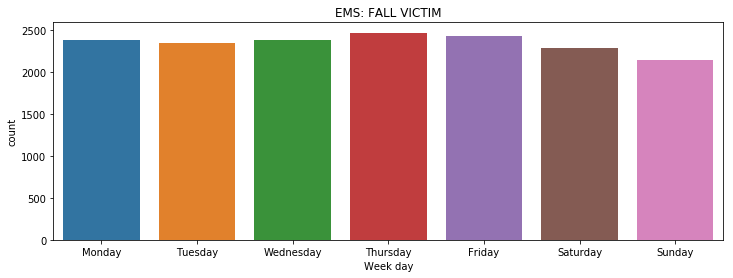

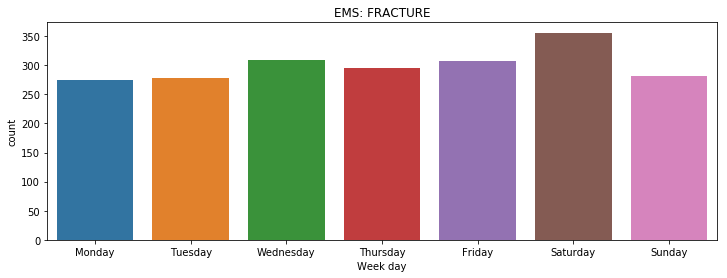

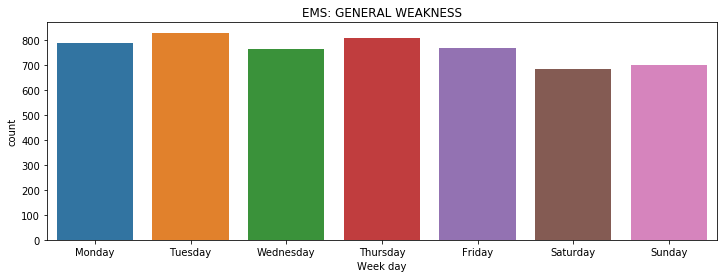

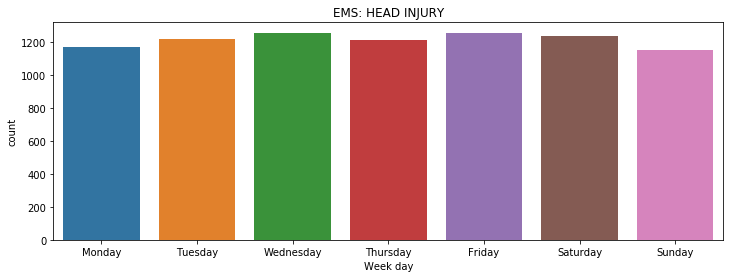

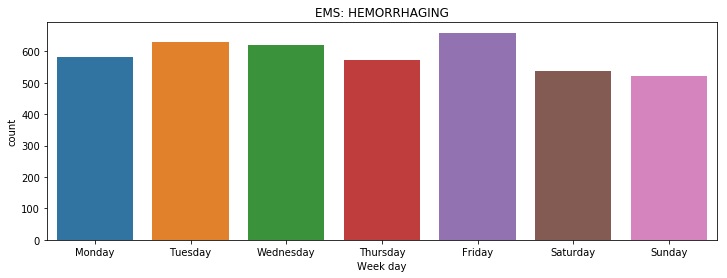

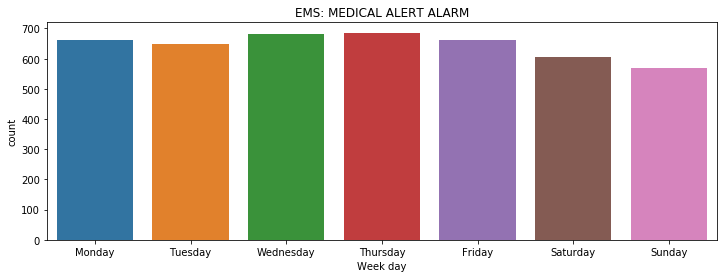

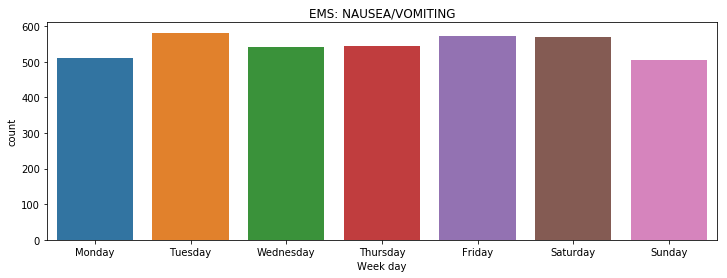

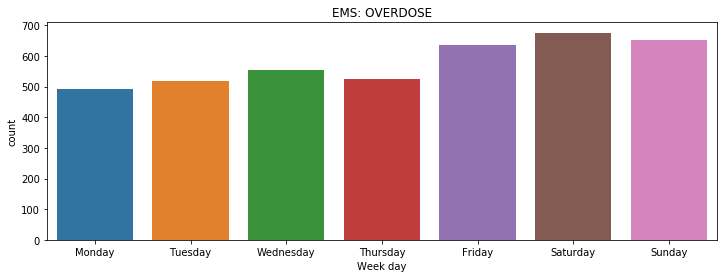

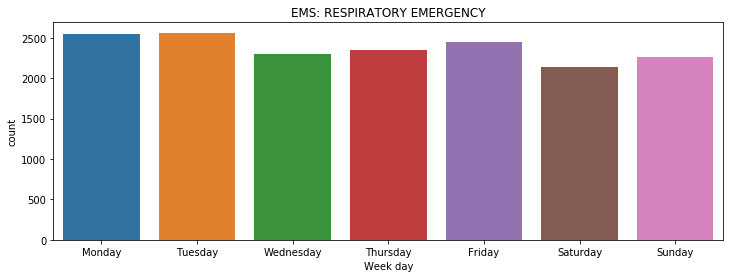

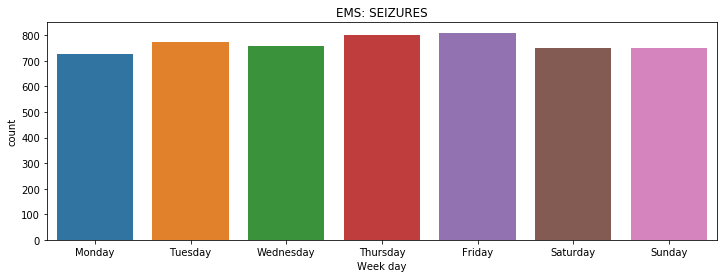

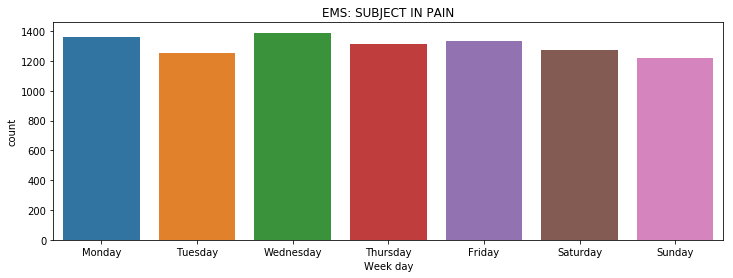

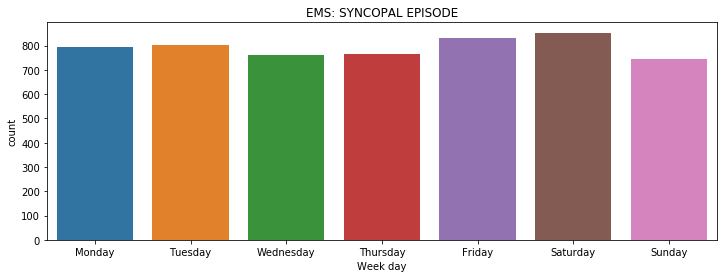

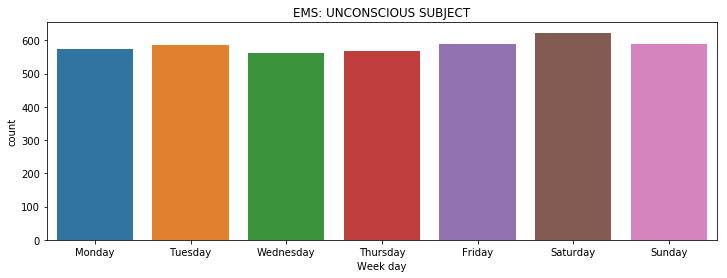

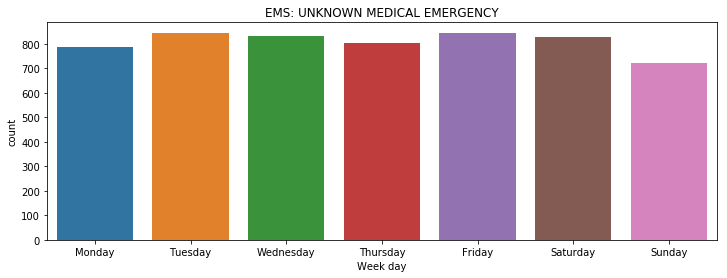

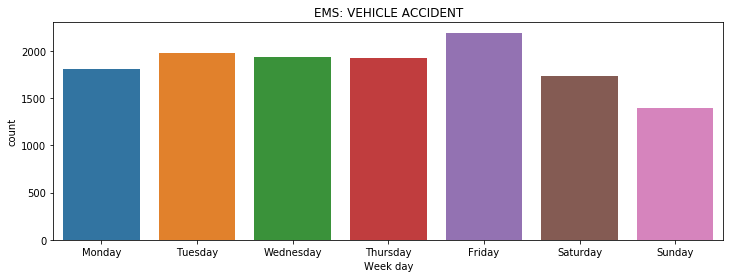

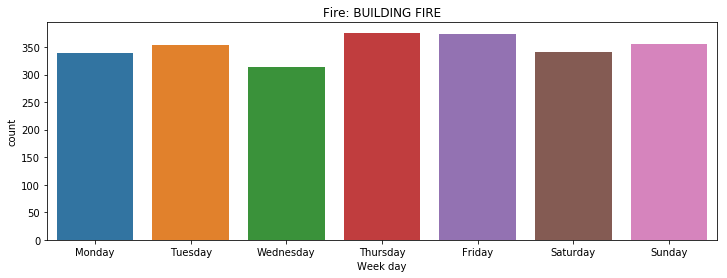

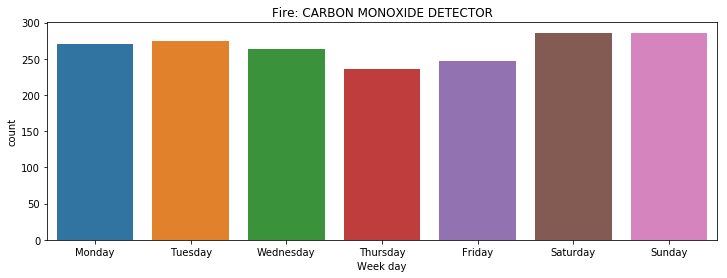

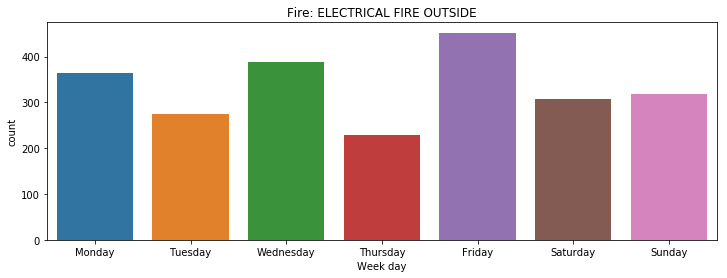

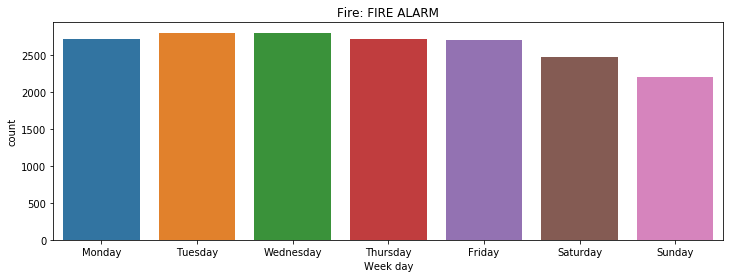

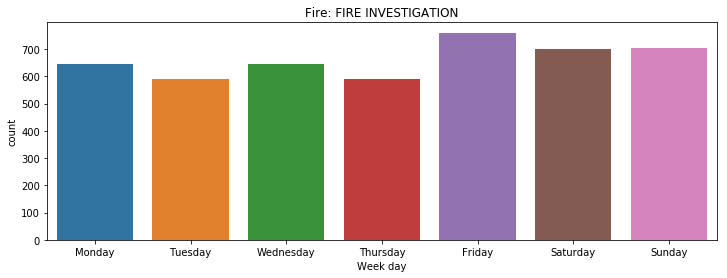

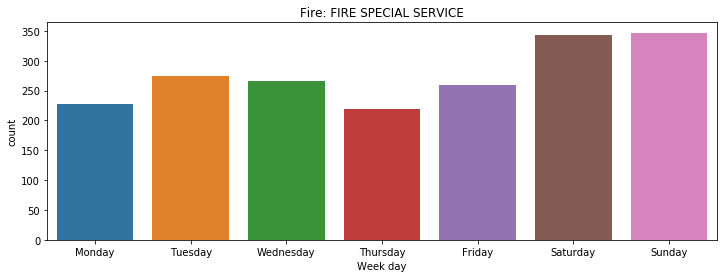

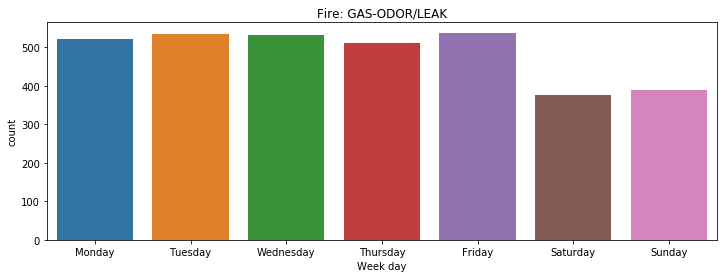

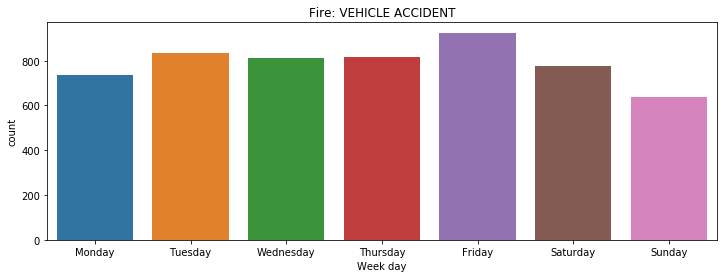

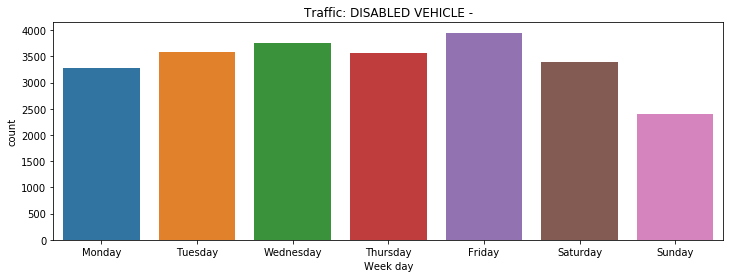

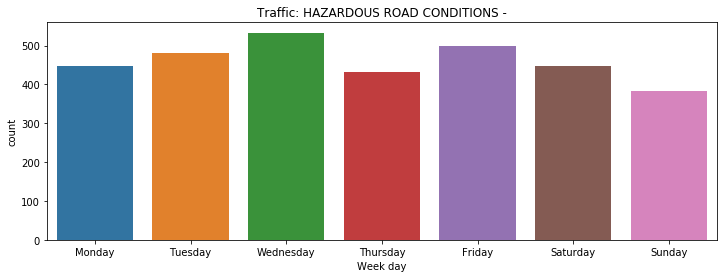

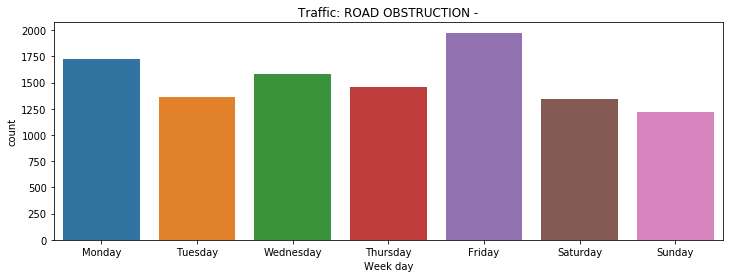

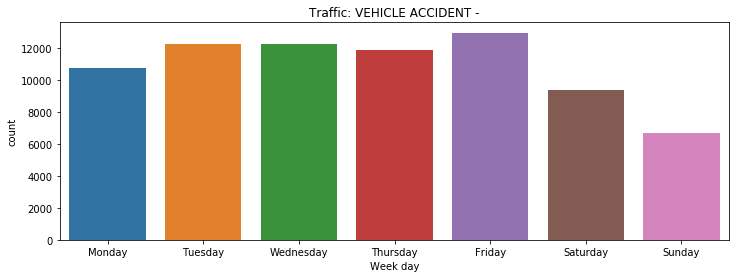

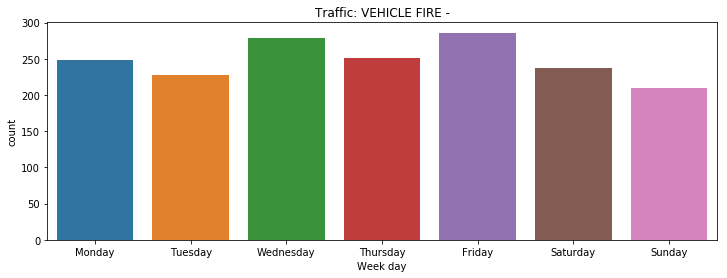

In [9]:
DATA = np.zeros((data.shape[0],6),dtype='O')
DATA[:,0] = data['lng'].values
DATA[:,1] = data['lat'].values
DATA[:,4] = data['title'].values
DATA[:,5] = data['twp'].values
for i in range(DATA.shape[0]):
    DATA[i,2] = data['timeStamp'].values[i][:10]
    DATA[i,3] = data['timeStamp'].values[i][10:]
    sp = DATA[i,3].split(':')
    DATA[i,3] = (int(sp[0])*3600 + int(sp[1])*60 + int(sp[2]))/3600
    
new_data = np.zeros(uniques.size,dtype = 'O')
for i in range(uniques.size):
    new_data[i] = DATA[np.where(DATA[:,4] == uniques[i])]
    
week = np.array(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

for i in range(new_data.shape[0]):
    for j in range(new_data[i].shape[0]):
        w = np.array(new_data[i][j,2].split('-')).astype(int)
        new_data[i][j,0] = week[calendar.weekday(w[0],w[1],w[2])]
        
for i in range(uniques.size):
    if new_data[i][:,3].size > 1700:
        plt.figure(figsize=(12,4))
        plt.title(new_data[i][0][-2])
        plt.xlabel("Week day")
        plt.ylabel(new_data[i][0][-2])
        print("Number of calls with " + new_data[i][0][-2] + " "+ str(new_data[i][:,3].size))
        sns.countplot((new_data[i][:,0]),order = week)

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



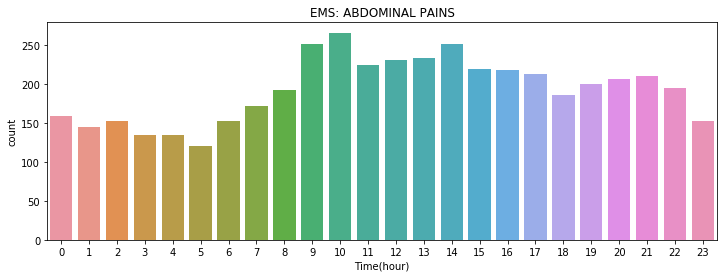

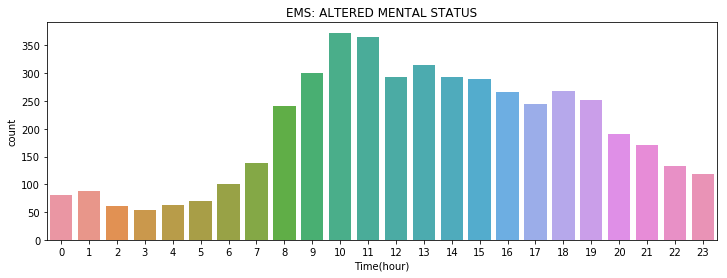

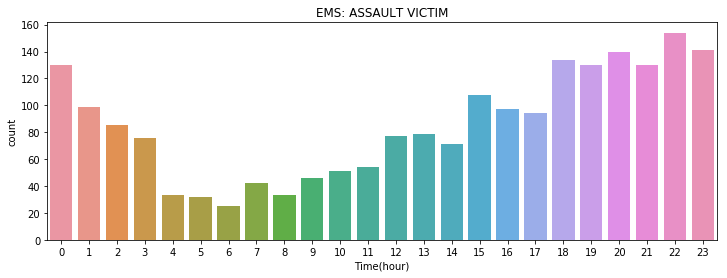

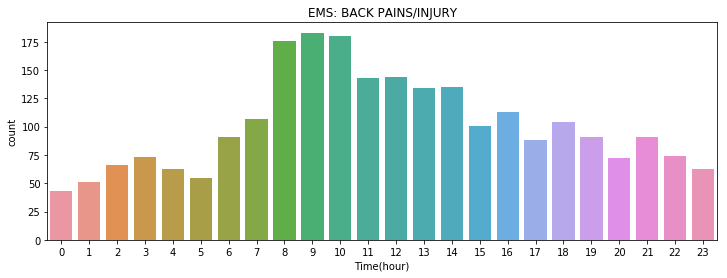

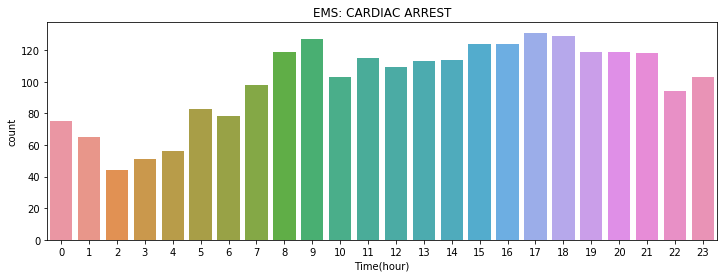

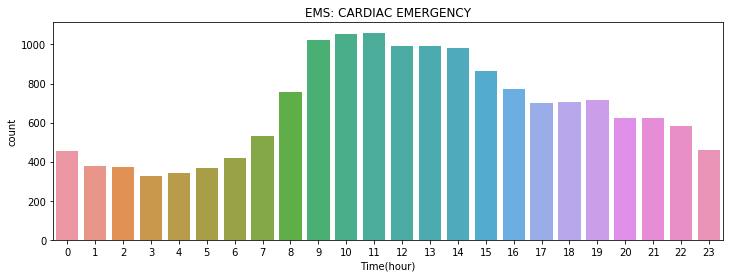

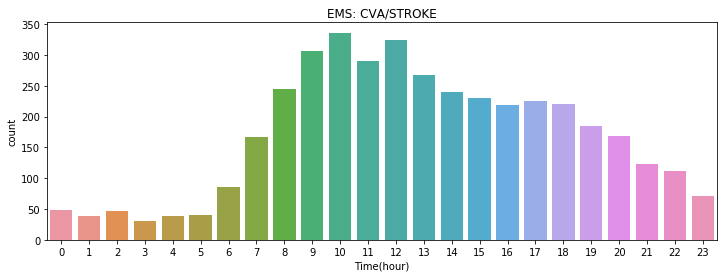

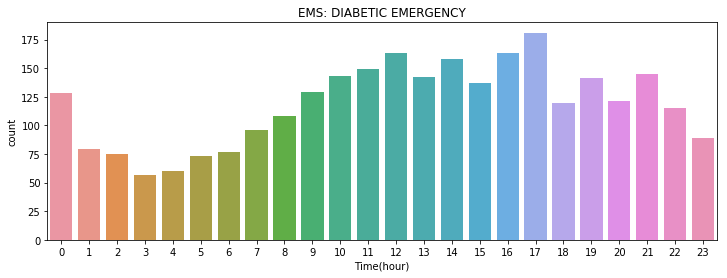

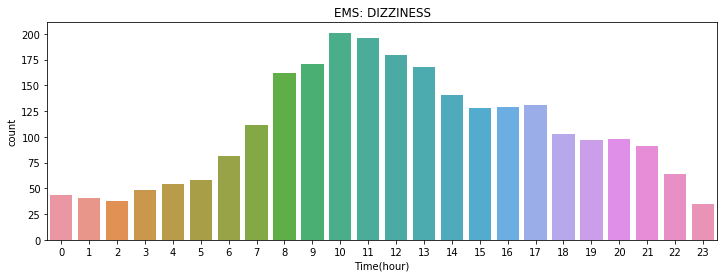

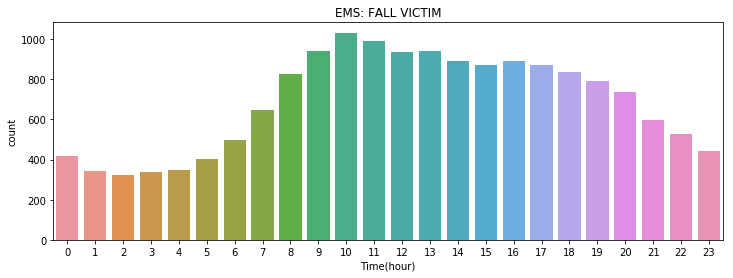

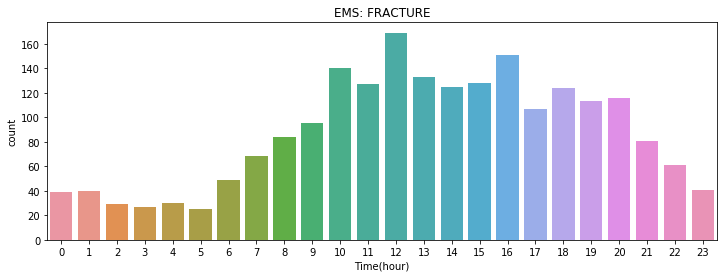

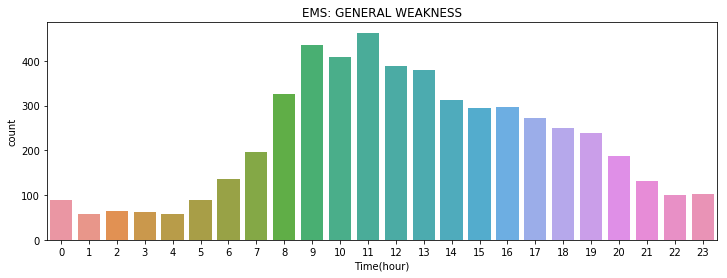

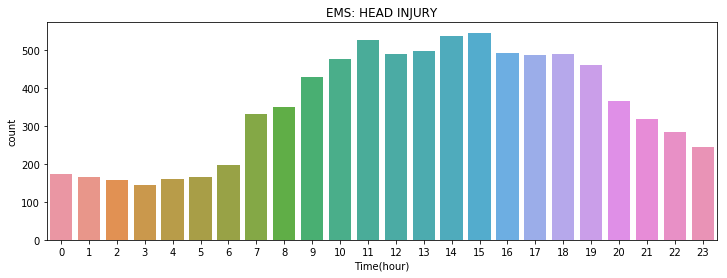

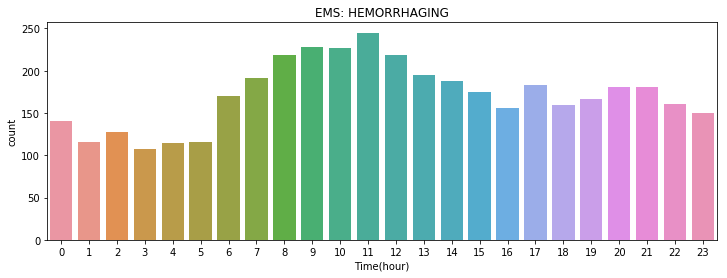

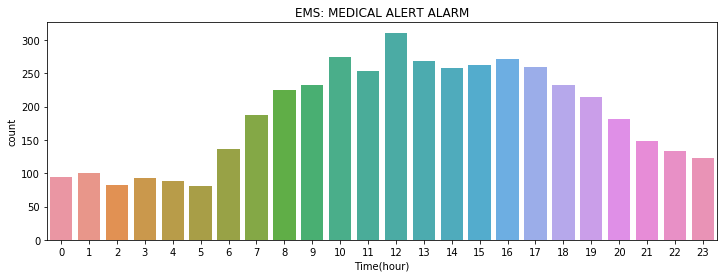

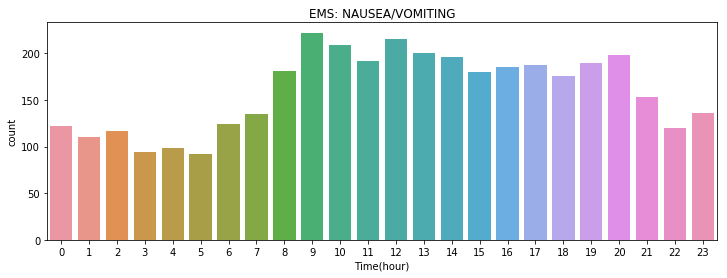

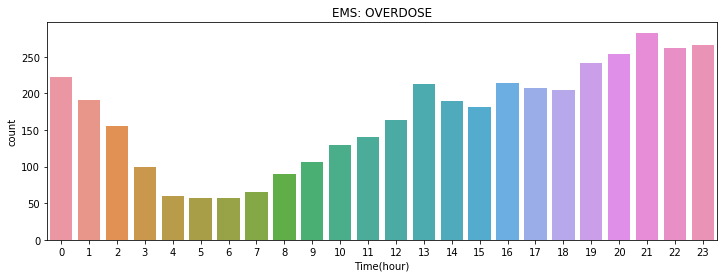

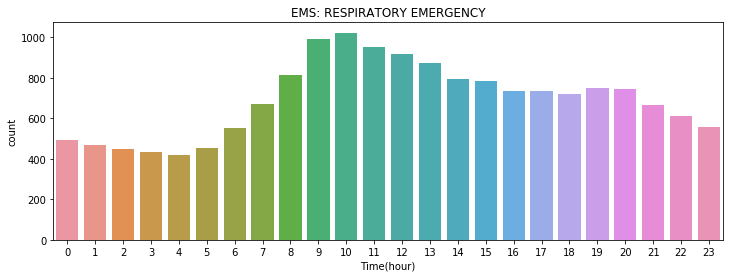

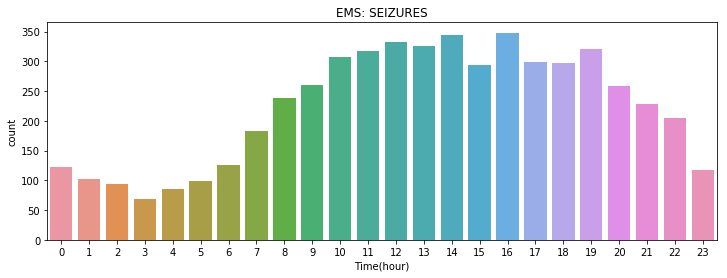

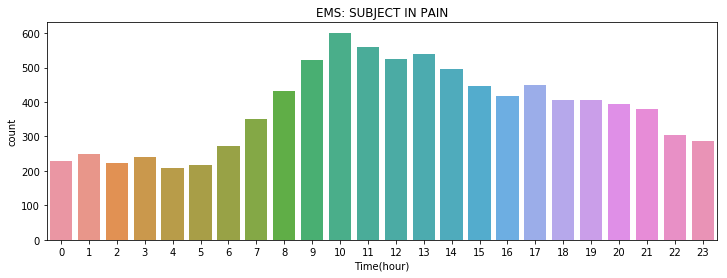

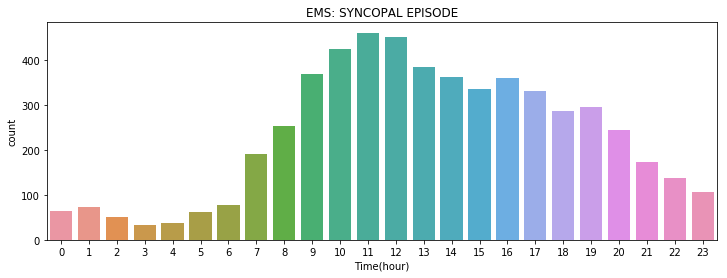

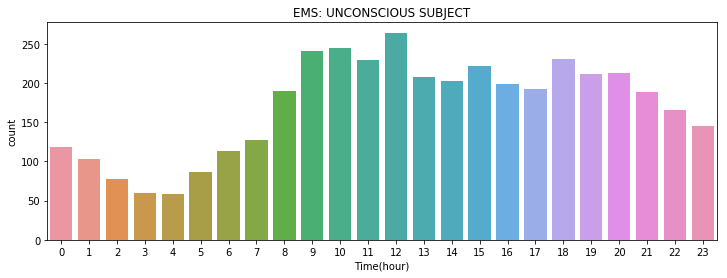

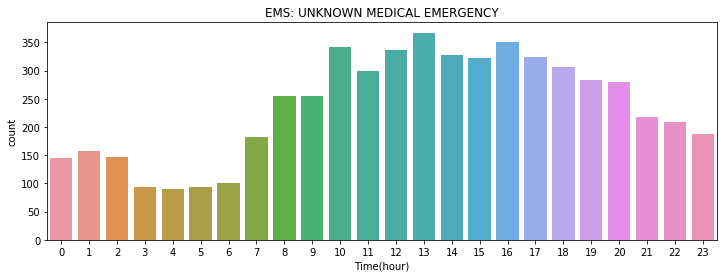

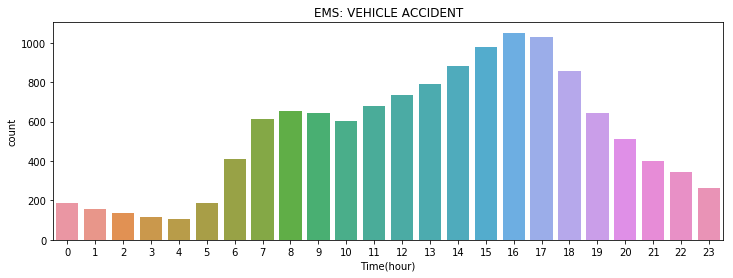

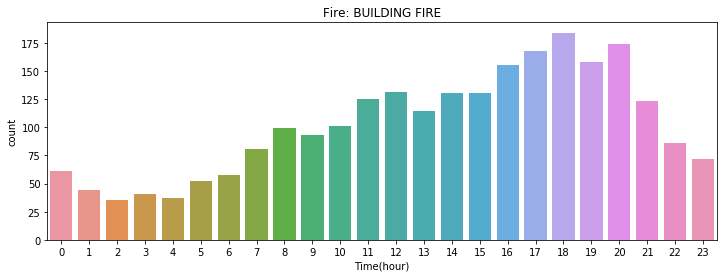

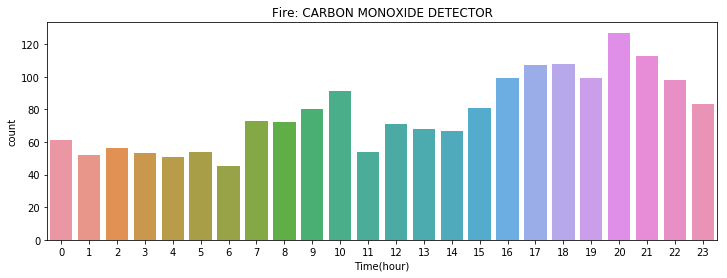

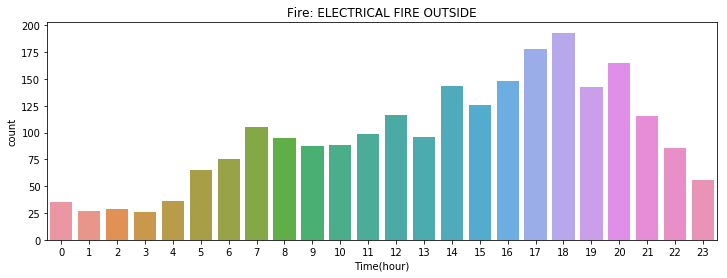

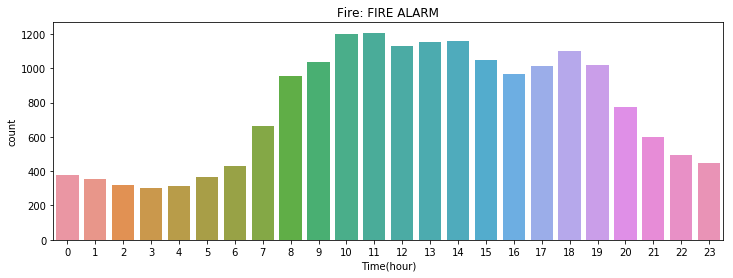

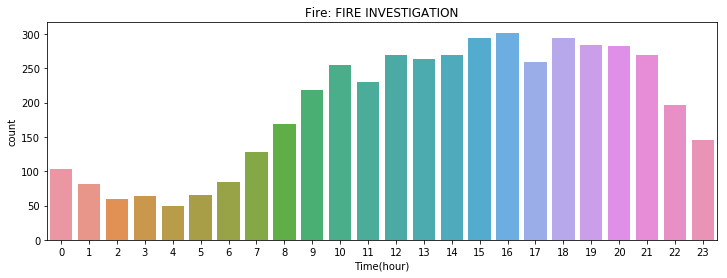

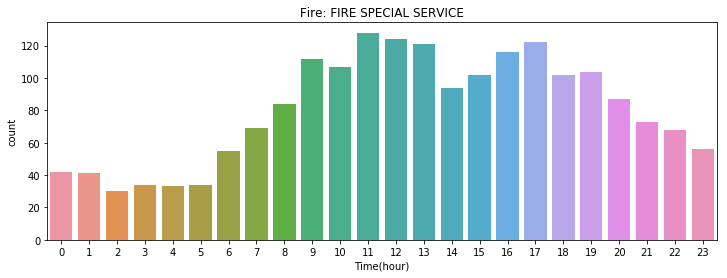

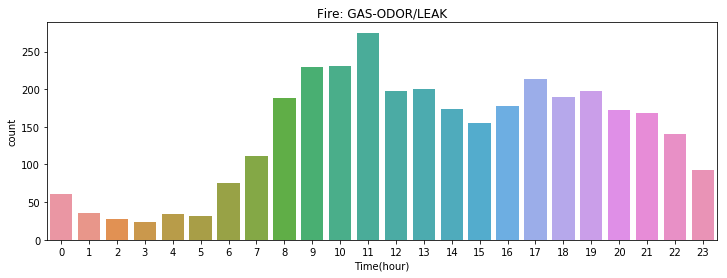

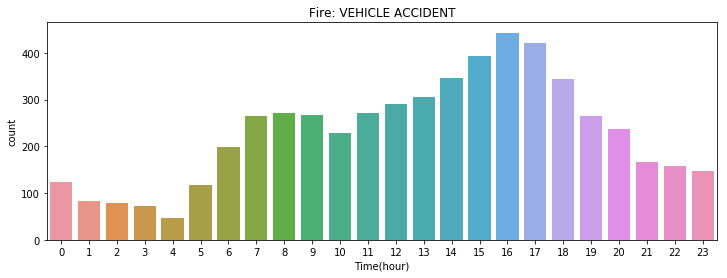

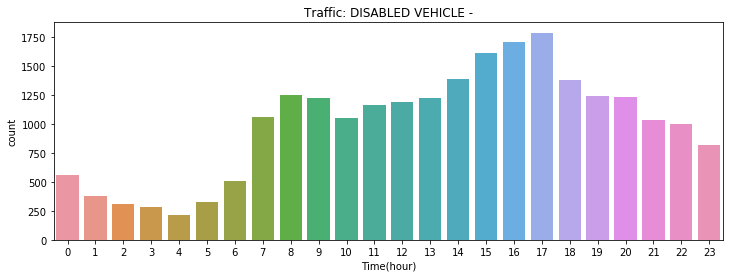

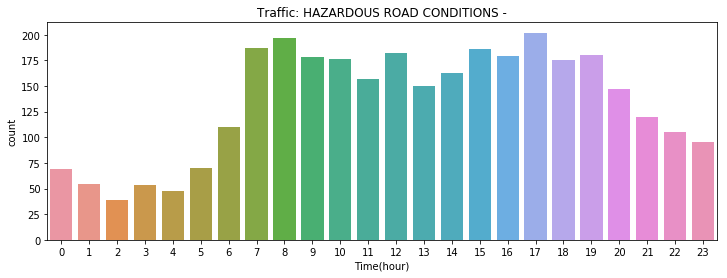

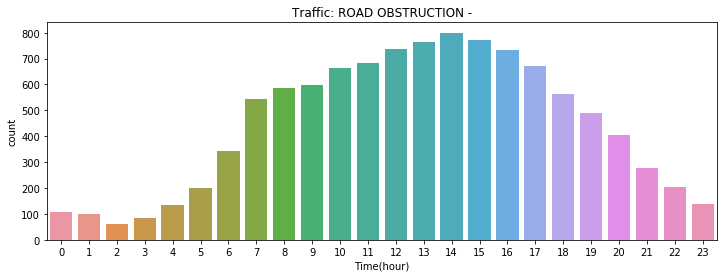

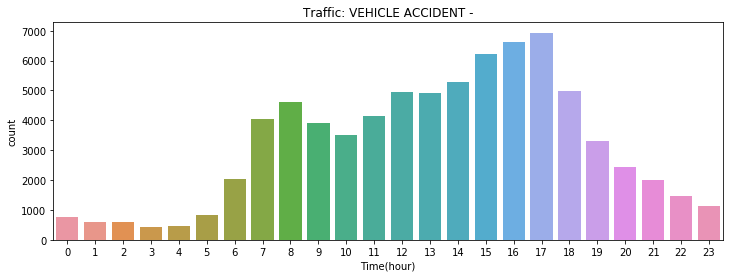

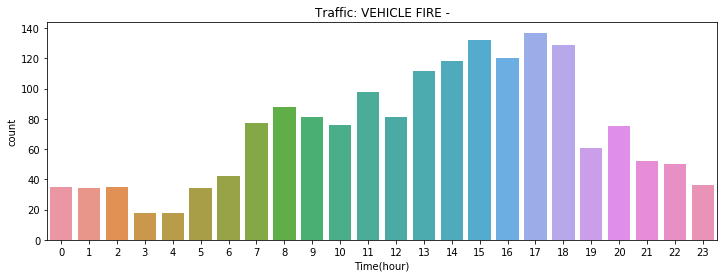

In [10]:
#Analyzing by hour in a day
for i in range(uniques.size):
    if new_data[i][:,3].size > 1700:
        plt.figure(figsize=(12,4))
        plt.title(new_data[i][0][-2])
        plt.xlabel("Time(hour)")
        plt.ylabel(new_data[i][0][-2])
        plt.xlim(0,24)
        sns.countplot((new_data[i][:,3]).astype(int))

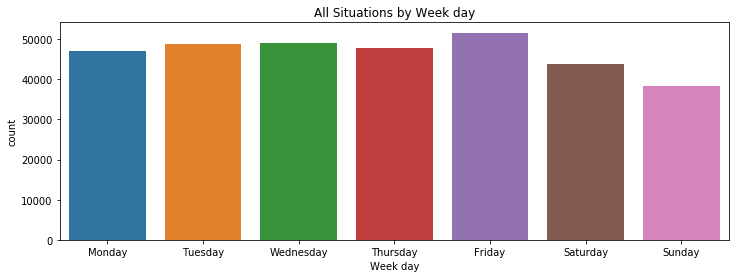

In [14]:
all_ = np.zeros(data["timeStamp"].values.size,dtype='O')
for i in range(all_.size):
    all_[i] = data['timeStamp'].values[i][:10]
for i in range(all_.size):
    w = np.array(all_[i].split('-')).astype(int)
    all_[i] = week[calendar.weekday(w[0],w[1],w[2])]
plt.figure(figsize=(12,4))
plt.xlabel("Week day")
plt.title("All Situations by Week day")
sns.countplot(all_,order = week)

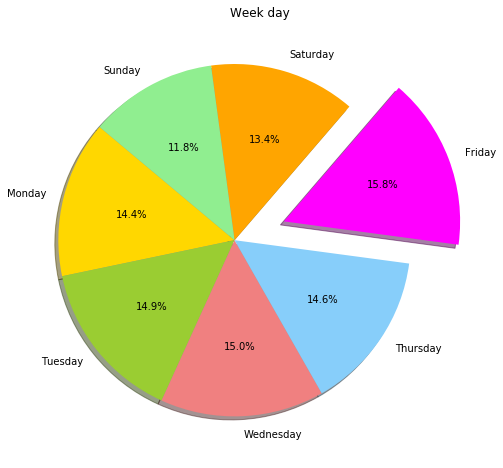

In [15]:
labels = "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
sizes = [np.sum(all_ == "Monday"),np.sum(all_ == "Tuesday"),np.sum(all_ == "Wednesday"),np.sum(all_ == "Thursday"),np.sum(all_ == "Friday"),\
         np.sum(all_ == "Saturday"),np.sum(all_ == "Sunday")]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','magenta','orange','lightgreen']
explode = (0, 0, 0, 0, 0.3, 0, 0)  # explode 1st slice
plt.figure(figsize=(8,8))
# Plot
plt.title('Week day')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()